# Session 7. 지도학습2
## Decision Tree / Support Vector Machine / Random Foreset / XGBoost

#### 작성자: 5기 공채린
#### 퀘스트 기한: 2019. 10. 13 (일) 23:59

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

In [4]:
df = pd.read_csv('AB_NYC_2019.csv', encoding='utf-8')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


뉴욕의 에어비엔비 데이터셋을 활용하여 방 타입, 숙박 가격, 최소숙박일수, 최근리뷰, 월 리뷰갯수 등으로부터 숙소의 위치를 알아내는 모델

편의상 맨하튼, 브루클린의 숙소들로 범위를 좁혔습니다

In [5]:
our_set = df[df['neighbourhood_group'].isin(['Brooklyn', 'Manhattan'])]
our_set.shape, df.shape

((41765, 16), (48895, 16))

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

### 자연어를 기계가 알아들을 수 있게 수치로 변환

In [10]:
our_set = our_set.replace('Brooklyn', 0).replace('Manhattan', 1)

### 룸 타입 역시 자연어로 되어있으므로, "원핫인코딩"을 통해 수치로 변환

In [11]:
x = pd.get_dummies(our_set['room_type'])
core_cols = our_set[['neighbourhood_group', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month']]
combined = core_cols.merge(x, left_index=True, right_index=True, how='left').reset_index()
combined.head()

,index,neighbourhood_group,price,minimum_nights,number_of_reviews,reviews_per_month,Entire home/apt,Private room,Shared room
0,0,0,149,1,9,0.21,0,1,0
1,1,1,225,1,45,0.38,1,0,0
2,2,1,150,3,0,NaN,0,1,0
3,3,0,89,1,270,4.64,1,0,0
4,4,1,80,10,9,0.10,1,0,0


### 불필요한 컬럼 제거, 결측치 제외

In [12]:
final = combined.drop(columns=['index']).dropna()
final.shape

(33079, 8)

In [14]:
final.head()

,neighbourhood_group,price,minimum_nights,number_of_reviews,reviews_per_month,Entire home/apt,Private room,Shared room
0,0,149,1,9,0.21,0,1,0
1,1,225,1,45,0.38,1,0,0
3,0,89,1,270,4.64,1,0,0
4,1,80,10,9,0.10,1,0,0
5,1,200,3,74,0.59,1,0,0


### 본격적인 모델링

In [33]:
### 랜덤포레스트 모델 수립, 대충 하이퍼 파라미터 제공
import time
from sklearn.ensemble import RandomForestClassifier
random_seed = random.randint(0,1000)
rf = RandomForestClassifier(n_estimators=200, oob_score=True, random_state=random_seed)  #이게 머신러닝하는 코드
### 학습 진행
t0 = time.time()  #현재 시간을 저장하는 것
rf.fit(X_train, y_train)
elapsed = time.time()-t0
print("걸린시간은 {:.2f}초입니다.".format(elapsed))

걸린시간은 6.09초입니다.


# ★퀘스트★

### 오늘 배운 모델들을 활용하여 (DT, SVM, XGBOOST / RF는 제외!!) 이보다 더 정교한 모델을 만들어보아요.
### 목표는 정확도 > 60%

(+추가)
같은 모델이더라도, 하이퍼 파라미터를 바꿔가며 코드를 실행해보면 결과가 달라집니다. 

time 모듈을 활용하여 각 모델별로 걸리는 시간도 측정해보아요.

생각보다 높은 정확도를 기록하였다면, 캐글에도 한번 등록해보아요. (https://kaggle.com)

모르는 게 있으면 질문도 좋습니다.

In [16]:
from sklearn import datasets
import xgboost as xgb

In [17]:
D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)

C:\Users\82107\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [18]:
param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3} 

steps = 20  

In [20]:
import time
from sklearn.ensemble import RandomForestClassifier
random_seed = random.randint(0,1000)
model = xgb.train(param, D_train, steps)  #이게 머신러닝하는 코드
### 학습 진행
t0 = time.time()  #현재 시간을 저장하는 것
elapsed = time.time()-t0
print("걸린시간은 {:.2f}초입니다.".format(elapsed))

걸린시간은 0.00초입니다.


In [21]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score

preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

Precision = 0.63736032846384
Recall = 0.6373430961303065
Accuracy = 0.6373639661426844


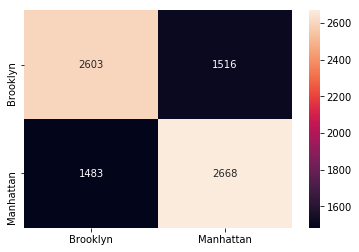

In [23]:
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test, best_preds), columns=['Brooklyn', 'Manhattan'], index=['Brooklyn', 'Manhattan'])
sns.heatmap(cm, annot=True, fmt='d')